# Introduction
In this notebook we will cover several topics:
- Logistic Regression
- Support Vector Machines (linear)

We will start of with a synthetic dataset to compare the different methods. All models are linear models and work with linear data. Support Vector Machines can work with non-linear data, but we will get into that later.

# Logistic Regression
Logistic regression is a classification technique. It is also known as logit-regression. It outputs probabilities which are modeled using a logistic function. 

Scikit-learn provides the `LogisticRegression` class for classification. It is able to fit binary, One-vs-Rest, or multinomial logistic regression. You have the option to set $l_1$, $l_2$, or Elastic-Net (both) regularization.

For an extensive description, see the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html" target="_blank">documentation</a> or <a href="https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression" target="_blank">user guide</a>

# Support Vector Machines (SVMs)
SVMs are a set of supervised methods that can be used for classification, regression and outlier detection. In this notebook, we will focus on classification.

Advantages:
- Effective in high dimensional spaces.
- Can still be effective when the number of features are bigger than the number of samples.
- Memory efficient.
- Different types of kernels, although we will focus on linear kernels.

Disadvantages:
- If the number of features is greater than the number of samples, regularization is critical to prevent overfitting.
- SVMs do not directly provide probability estimates, such as with logistic regression.

There are different types of SVMs. Scikit-learn provides several for classification:
- `SVC`: implementation based on *libsvm*. Fit time scales at quadratically.
- `NuSVC`: similar to `SVC` but controls the number of support vectors.
- `LinearSVC`: fast implementation for linear kernel.

In our case it is easiest to use LinearSVC, but feel free to play around with other configurations.

For an extensive description, see the <a href="https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm" target="_blank">documentation</a> or <a href="https://scikit-learn.org/stable/modules/svm.html#svm" target="_blank">user guide</a>

# Demo

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

### Create dataset with linear signals
Let's create a linear dataset for demonstration purposes and look at the classification performance.

Data split:
- Training set: first 100 samples
- Test set: last 100 samples

In [2]:
X, y = make_classification(n_samples=200,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           random_state=0,
                           shuffle=True)

print(X.shape, y.shape)

(200, 2) (200,)


In [3]:
print(np.unique(y, return_counts=True))

(array([0, 1]), array([100, 100], dtype=int64))


In [4]:
print(X.min(), X.max())

-3.4423002664236364 3.8246288578434964


In [5]:
X_train, X_test = X[:100], X[100:]
y_train, y_test = y[:100], y[100:]

##### Setup models

In [6]:
lr = LogisticRegression()
svm = LinearSVC()

In [7]:
lr.fit(X_train, y_train)
svm.fit(X_train, y_train)

LinearSVC()

##### Contours

In [8]:
def make_meshgrid(X, h=.01):
    """Create a mesh grid based on vectors X and Y."""
    if X.shape[1] > 2:
        raise ValueError('Requires a matrix of 2 features for visualization purposes.')
    
    x_min = X.min() - 1
    x_max = X.max() + 1
        
    x = np.arange(x_min, x_max, h)
        
    xx, yy = np.meshgrid(x, x)
    
    return xx, yy

In [9]:
xx, yy = make_meshgrid(X)
grid = np.c_[xx.ravel(), yy.ravel()]

In [10]:
# get the predictions, svm does not have probabilities, only confidence intervals
lr_prob = lr.predict_proba(grid)[:, 1].reshape(xx.shape)
svm_pred = svm.predict(grid).reshape(xx.shape)

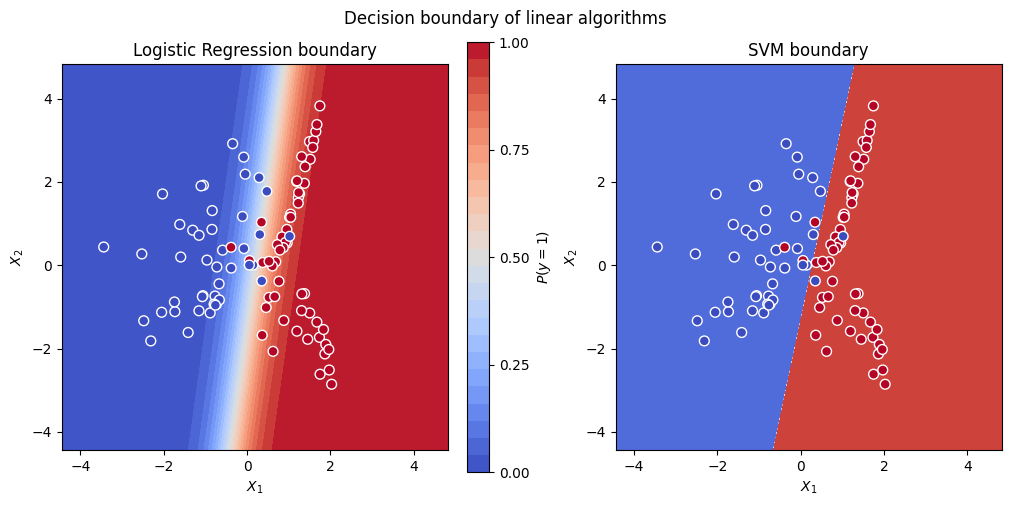

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), layout="constrained")

fig.suptitle('Decision boundary of linear algorithms')

# flatten for easier manipulation
axes.ravel()

# logistic regression
contour = axes[0].contourf(xx, yy, lr_prob, 25, cmap=plt.cm.coolwarm)
ax_c = fig.colorbar(contour)
ax_c.set_label('$P(y = 1)$')
ax_c.set_ticks([0, .25, .5, .75, 1])
axes[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='white', linewidth=1, s=50, cmap=plt.cm.coolwarm)
axes[0].set(aspect='equal',
           xlim=(X.min() - 1, X.max() + 1),
           ylim=(X.min() - 1, X.max() + 1),
           xlabel='$X_1$',
           ylabel='$X_2$')
axes[0].set_title('Logistic Regression boundary')

# SVM
axes[1].contourf(xx, yy, svm_pred, cmap=plt.cm.coolwarm)
axes[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='white', linewidth=1, s=50, cmap=plt.cm.coolwarm)
axes[1].set(aspect='equal',
           xlim=(X.min() - 1, X.max() + 1),
           ylim=(X.min() - 1, X.max() + 1),
           xlabel='$X_1$',
           ylabel='$X_2$')
axes[1].set_title('SVM boundary')

plt.show()

We can clearly see that linear algorithms are exceptionally good at separating linear signals. What would happen if we have a dataset with non-linear signals?

In [12]:
X, y = make_moons(n_samples=200, random_state=0, shuffle=True)

X_train, X_test = X[:100], X[100:]
y_train, y_test = y[:100], y[100:]

In [13]:
lr = LogisticRegression()
svm = LinearSVC()

lr.fit(X_train, y_train)
svm.fit(X_train, y_train)

LinearSVC()

In [14]:
xx, yy = make_meshgrid(X)
grid = np.c_[xx.ravel(), yy.ravel()]

lr_prob = lr.predict_proba(grid)[:, 1].reshape(xx.shape)
svm_pred = svm.predict(grid).reshape(xx.shape)

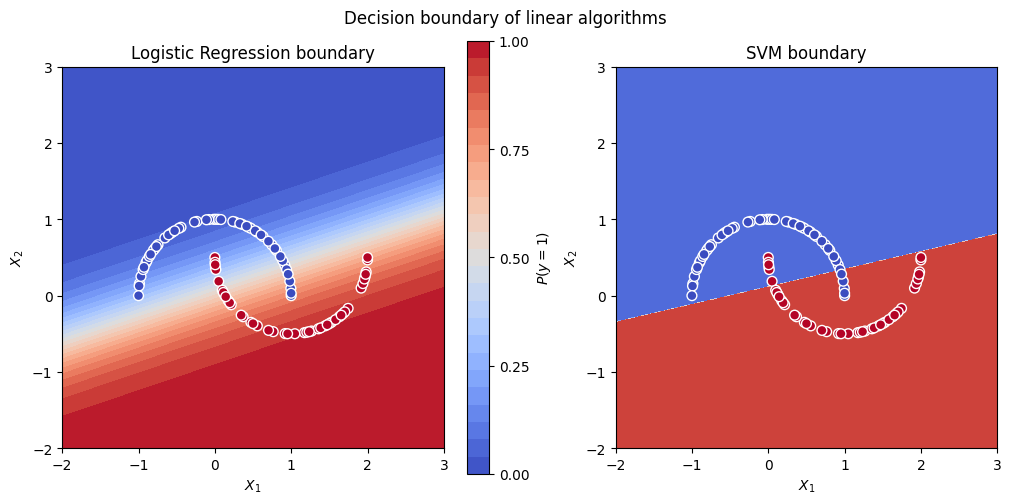

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), layout="constrained")

fig.suptitle('Decision boundary of linear algorithms')

# flatten for easier manipulation
axes.ravel()

# logistic regression
contour = axes[0].contourf(xx, yy, lr_prob, 25, cmap=plt.cm.coolwarm)
ax_c = fig.colorbar(contour)
ax_c.set_label('$P(y = 1)$')
ax_c.set_ticks([0, .25, .5, .75, 1])
axes[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='white', linewidth=1, s=50, cmap=plt.cm.coolwarm)
axes[0].set(aspect='equal',
           xlim=(X.min() - 1, X.max() + 1),
           ylim=(X.min() - 1, X.max() + 1),
           xlabel='$X_1$',
           ylabel='$X_2$')
axes[0].set_title('Logistic Regression boundary')

# SVM
axes[1].contourf(xx, yy, svm_pred, cmap=plt.cm.coolwarm)
axes[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='white', linewidth=1, s=50, cmap=plt.cm.coolwarm)
axes[1].set(aspect='equal',
           xlim=(X.min() - 1, X.max() + 1),
           ylim=(X.min() - 1, X.max() + 1),
           xlabel='$X_1$',
           ylabel='$X_2$')
axes[1].set_title('SVM boundary')

plt.show()

We can clearly see that linear models are unable to separate non-linear signals. This results in inaccurate representations. It is important to understand that different models are useful in different situations. Most real life dataset contain a mixture of linear and non-linear signals.

**Conclusion**:
- Linear models are exceptionally good in separating linear-signals.
- We need other methods to separate non-linear signals.